Dataset Information

The main objective of the work is the application of logic regression techniques in order to automate the loan eligibility.
These Analysis techniques will be applied to a data matrix that gathers information on more than 600 customers.

The work has 3 parts. In the first, I made an exploratory analysis of the data matrix . In the 2 chapter,  I applied a different statistic model, and I selected Logic Regression. In chapter 3,with this model in a Web I give or not a credit to someone who enters the necessary data.



## 1. Exploratory Analysis

1.1 import Modules :
I will work with pandas, numpy, seaborn,matplotlib,sklearn and dump

In [409]:


import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import sklearn as skl

from joblib import dump
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression



1.2 Loading the dataset

In [410]:

df=pd.read_excel("data.xlsx")
df.head()

,Loan_ID,Gender,Years,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,30.0,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,60.0,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,25.0,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,N
3,LP001006,Male,18.0,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,N
4,LP001008,Male,23.0,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,N


1.2 Describe the dataset

In [411]:

df.describe()

,Years,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,610.000000,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,48.850690,0.762938,5403.459283,1629.169251,146.412162,342.00000,0.842199
std,14.484102,1.015216,6109.041673,2926.366843,85.587325,65.12041,0.364878
min,18.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,38.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,54.451659,0.000000,3812.500000,1221.000000,128.000000,360.00000,1.000000
75%,60.000000,2.000000,5795.000000,2324.000000,168.000000,360.00000,1.000000
max,65.212987,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


I noticed that we have some missing values, the maximum values are 614 and Years, LoanAmount, 
LoanAmount Term, and credit history we have less than 614, so, 
I should make a decision in order to make something with this missing values.


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Years              610 non-null    float64
 3   Married            611 non-null    object 
 4   Dependents         599 non-null    float64
 5   Education          614 non-null    object 
 6   Self_Employed      582 non-null    object 
 7   ApplicantIncome    614 non-null    int64  
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         592 non-null    float64
 10  Loan_Amount_Term   600 non-null    float64
 11  Credit_History     564 non-null    float64
 12  Property_Area      614 non-null    object 
 13  Loan_Status        614 non-null    object 
dtypes: float64(6), int64(1), object(7)
memory usage: 67.3+ KB


We have only 6 quantitative variables: Years, ApplicantiIncome,
CoapplicantIncome,LoanAmount,Loan_Amount_Term and Credit_History, and only 2 are continuos variables.
The rest are qualitative variables.

1.3.Processing Dataset



1.3.1 Finds missing values

In [413]:

df.isnull().sum()

Loan_ID               0
Gender               13
Years                 4
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We have 7 variables with missing values , we filling :
 a. Quantitative variables with the mean
 b. Qualitative variables with the mode

In [414]:
#a.Cuantitative variables
df["Years"]=df["Years"].fillna(df["Years"].mean())
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mean())

In [415]:
#Checking mode for categorical variables
df["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [416]:
df["Married"].mode()

0    Yes
Name: Married, dtype: object

In [417]:
df["Dependents"].mode()

0    0.0
Name: Dependents, dtype: float64

In [418]:
df["Self_Employed"].mode()

0    No
Name: Self_Employed, dtype: object

In [419]:
#b. filling categorical variables with the mode
df["Gender"].mode()
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"].mode()
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [420]:
#Cheching again missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Years                0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

1.4 Exploratory Data Analysis

1.4.1 Categorical Variables

- Gender

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

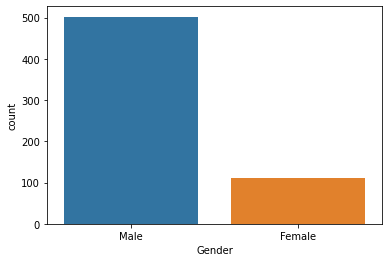

In [421]:
sns.countplot(df["Gender"])

In [422]:

pd.crosstab(index=df["Gender"], columns=df["Loan_Status"],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)


Loan_Status,N,Y,All
Gender,,,
Female,5.700326,12.540717,18.241042
Male,24.429967,57.328990,81.758958
All,30.130293,69.869707,100.000000


In [423]:
pd.crosstab(index=df['Gender'], columns=df['Loan_Status']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Loan_Status,N,Y
Gender,,
Female,31.250000,68.750000
Male,29.880478,70.119522


In general we gave more credit to men than to women. More than 30% didn't pay, ( 33%  0f the woman and 30% men) We can not say that sex determines behavior.

-Married

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

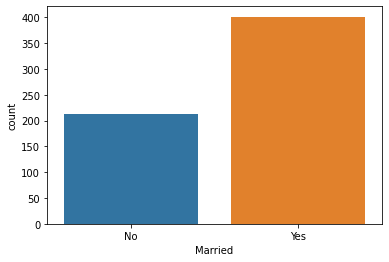

In [424]:
sns.countplot(df["Married"])

In [425]:
pd.crosstab(index=df["Married"], columns=df["Loan_Status"],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Loan_Status,N,Y,All
Married,,,
No,11.889251,22.801303,34.690554
Yes,18.241042,47.068404,65.309446
All,30.130293,69.869707,100.000000


In [426]:
pd.crosstab(index=df['Married'], columns=df['Loan_Status']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Loan_Status,N,Y
Married,,
No,34.272300,65.727700
Yes,27.930175,72.069825


In general we gave more credit to married than to single. 37% single didn't pay the credit against 28% married. So, if a person is married or not can determine their behavior

-Dependents

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

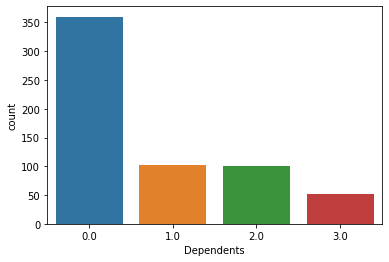

In [427]:
sns.countplot(df["Dependents"])

In [428]:
pd.crosstab(index=df["Dependents"], columns=df["Loan_Status"],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Loan_Status,N,Y,All
Dependents,,,
0.0,17.100977,41.530945,58.631922
1.0,5.863192,10.749186,16.612378
2.0,4.397394,12.052117,16.449511
3.0,2.768730,5.537459,8.306189
All,30.130293,69.869707,100.000000


In [429]:
pd.crosstab(index=df['Dependents'], columns=df['Loan_Status']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Loan_Status,N,Y
Dependents,,
0.0,29.166667,70.833333
1.0,35.294118,64.705882
2.0,26.732673,73.267327
3.0,33.333333,66.666667


We give more credit to persons that have not dependents, but the number of dependents can not determine the behavior

-Education

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

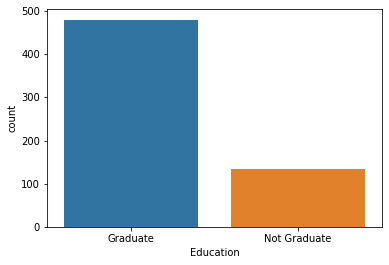

In [430]:
sns.countplot(df["Education"])

In [431]:
pd.crosstab(index=df["Education"], columns=df["Loan_Status"],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Loan_Status,N,Y,All
Education,,,
Graduate,21.986971,56.188925,78.175896
Not Graduate,8.143322,13.680782,21.824104
All,30.130293,69.869707,100.000000


In [432]:
pd.crosstab(index=df['Education'], columns=df['Loan_Status']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Loan_Status,N,Y
Education,,
Graduate,28.125000,71.875000
Not Graduate,37.313433,62.686567


We give more credit to graduated. If your are not graduated, you have more probability to not pay

- Self employed

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

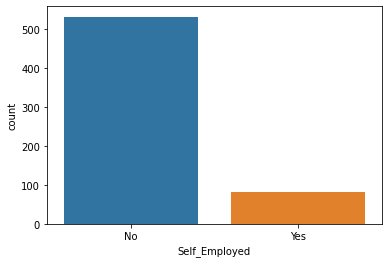

In [433]:

sns.countplot(df["Self_Employed"])

In [434]:
pd.crosstab(index=df["Self_Employed"], columns=df["Loan_Status"],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Loan_Status,N,Y,All
Self_Employed,,,
No,26.058632,60.586319,86.644951
Yes,4.071661,9.283388,13.355049
All,30.130293,69.869707,100.000000


In [435]:
pd.crosstab(index=df['Self_Employed'], columns=df['Loan_Status']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Loan_Status,N,Y
Self_Employed,,
No,30.075188,69.924812
Yes,30.487805,69.512195


Self_Employed or not cannot determined the behavior

1.4.2 Create New Attributes

- 1.4.2.1New Variable : Total Income

In [436]:
df["Total_Income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]


-1.4.2.2 New Variable : Group Age

In [437]:

bins = [18, 29, 39, 49, 59, 69, 1000]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

df["Group_Age"]  = pd.cut(df["Years"], bins, labels = labels,include_lowest = True)

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Group_Age', ylabel='count'>

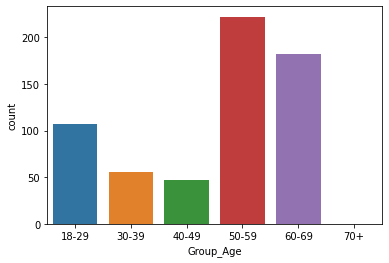

In [438]:

sns.countplot(df["Group_Age"])

In [439]:
pd.crosstab(index=df["Group_Age"], columns=df["Loan_Status"],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Loan_Status,N,Y,All
Group_Age,,,
18-29,8.306189,9.120521,17.426710
30-39,2.442997,6.677524,9.120521
40-49,2.117264,5.537459,7.654723
50-59,8.143322,28.013029,36.156352
60-69,9.120521,20.521173,29.641694
All,30.130293,69.869707,100.000000


In [440]:
pd.crosstab(index=df['Group_Age'], columns=df['Loan_Status']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Loan_Status,N,Y
Group_Age,,
18-29,47.663551,52.336449
30-39,26.785714,73.214286
40-49,27.659574,72.340426
50-59,22.522523,77.477477
60-69,30.769231,69.230769


we gave more credits to persons between 50-59.Between 18-29 47% people didn't pay. So, if a person is between 18-29 can determined the behavior.

1.4.3 Quantitative Variables

-ApplicantIncome

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

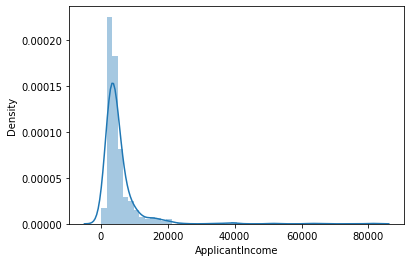

In [441]:
sns.distplot(df["ApplicantIncome"])

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Z_ApplicantIncome', ylabel='Density'>

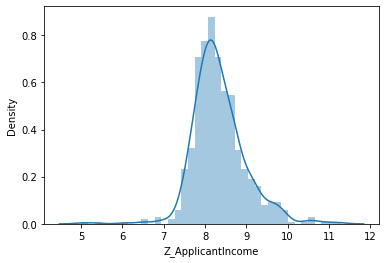

In [442]:
#apply log transformation to the attribute
df["Z_ApplicantIncome"]=np.log(df["ApplicantIncome"])
sns.distplot(df["Z_ApplicantIncome"])

-Total_Income

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

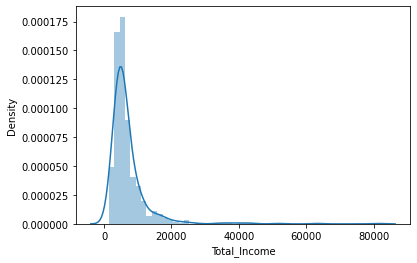

In [443]:
sns.distplot(df["Total_Income"])

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Z_Total_Income', ylabel='Density'>

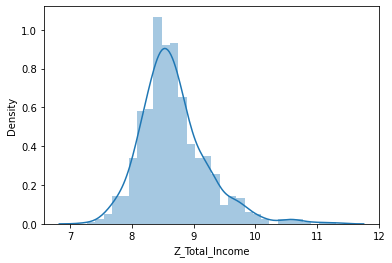

In [444]:
df["Z_Total_Income"]=np.log(df["Total_Income"])
sns.distplot(df["Z_Total_Income"])

-Loan Amount

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

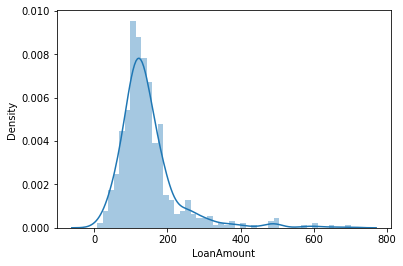

In [445]:
sns.distplot(df["LoanAmount"])

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Z_LoanAmount', ylabel='Density'>

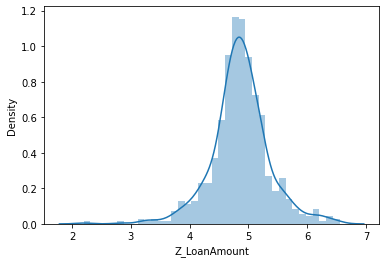

In [446]:
df["Z_LoanAmount"]=np.log(df["LoanAmount"])
sns.distplot(df["Z_LoanAmount"])

- Loan Amount Term

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

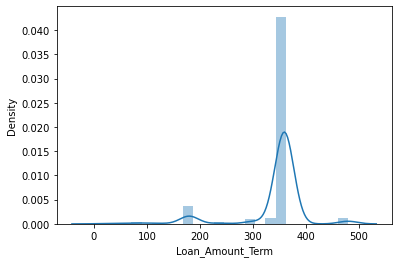

In [447]:
sns.distplot(df["Loan_Amount_Term"])

C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Z_Loan_Amount_Term', ylabel='Density'>

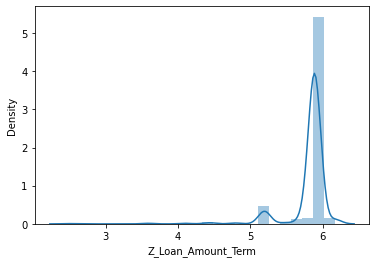

In [448]:
df["Z_Loan_Amount_Term"]=np.log(df["Loan_Amount_Term"])
sns.distplot(df["Z_Loan_Amount_Term"])

1.4.4 Correlation Matrix

<AxesSubplot:>

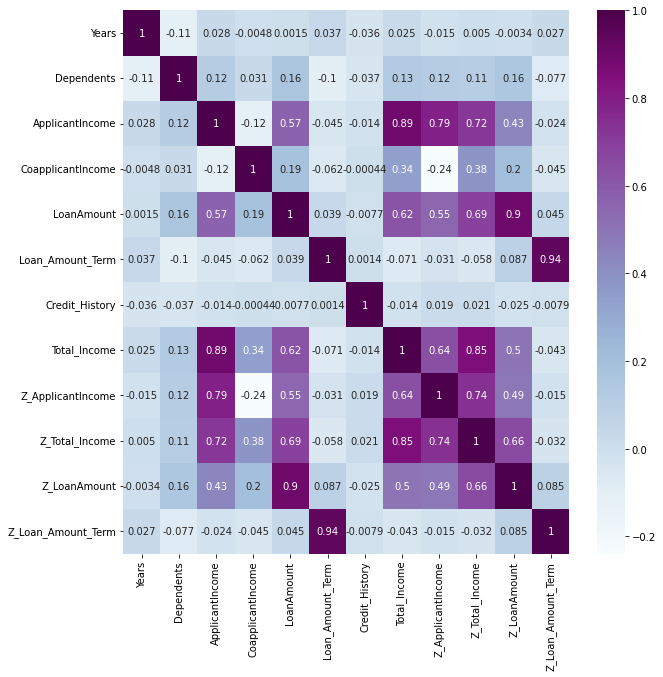

In [449]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

- Drop columns that are correlated

In [450]:
cols=['Years','Loan_ID','ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income',"Z_ApplicantIncome"]

In [451]:
df=df.drop(cols, axis=1)
df.head(10)


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Group_Age,Z_Total_Income,Z_LoanAmount,Z_Loan_Amount_Term
0,Male,No,0.0,Graduate,No,1.0,Urban,Y,30-39,8.674026,4.986426,5.886104
1,Male,Yes,1.0,Graduate,No,1.0,Rural,N,60-69,8.714568,4.852030,5.886104
2,Male,Yes,0.0,Graduate,Yes,1.0,Urban,N,18-29,8.006368,4.189655,5.886104
3,Male,Yes,0.0,Not Graduate,No,1.0,Urban,N,18-29,8.505323,4.787492,5.886104
4,Male,No,0.0,Graduate,No,1.0,Urban,N,18-29,8.699515,4.948760,5.886104
5,Male,Yes,2.0,Graduate,Yes,1.0,Urban,Y,40-49,9.170872,5.587249,5.886104
6,Male,Yes,0.0,Not Graduate,No,1.0,Urban,N,18-29,8.255569,4.553877,5.886104
7,Male,Yes,3.0,Graduate,No,0.0,Semiurban,N,18-29,8.619750,5.062595,5.886104
8,Male,Yes,2.0,Graduate,No,1.0,Urban,Y,60-69,8.618305,5.123964,5.886104
9,Male,Yes,1.0,Graduate,No,1.0,Semiurban,N,18-29,10.077819,5.855072,5.886104


- Transform qualitative Variable to quantitative

In [452]:

cat_cols =["Gender","Married","Self_Employed","Property_Area","Loan_Status","Education","Group_Age"]
lab = preprocessing.LabelEncoder()
for col in cat_cols:
    df[col]=lab.fit_transform(df[col])

df.head()    

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Group_Age,Z_Total_Income,Z_LoanAmount,Z_Loan_Amount_Term
0,1,0,0.0,0,0,1.0,2,1,1,8.674026,4.986426,5.886104
1,1,1,1.0,0,0,1.0,0,0,4,8.714568,4.852030,5.886104
2,1,1,0.0,0,1,1.0,2,0,0,8.006368,4.189655,5.886104
3,1,1,0.0,1,0,1.0,2,0,0,8.505323,4.787492,5.886104
4,1,0,0.0,0,0,1.0,2,0,0,8.699515,4.948760,5.886104


## 2. Train-Test-Split

2.1 Variable to explain : Loan_Status ( behavior of the client)

In [453]:

X=df.drop("Loan_Status",axis=1)
y = df["Loan_Status"]

In [454]:

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)

2.2 Accuracy and cross Validation to know how good the model is

In [455]:
def classify(model,x,y):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)
        model.fit(x_train,y_train)
        print("Accuracy is ",model.score(x_test,y_test)*100)
        score=cross_val_score(model,x,y,cv=5)
        print("Cross_Validation is ",np.mean(score)*100)

2.3 Apply Model Logistic Regression

In [456]:

model=LogisticRegression()
classify(model,X,y)


Accuracy is  76.62337662337663
Cross_Validation is  77.03585232573637


C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\luabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

2.4 Confusion Matrix

<AxesSubplot:>

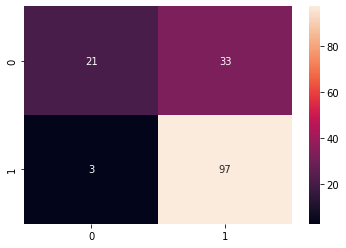

In [457]:

y_pred = model.predict(x_test)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot =True)




To predict to give , the model is good but often I give a credit but I should not give. 
To solve this situation, when the client is 18-29 years, is single and not graduated, goes to particular analysis

3. To Frontend

In [458]:
dump(model,"model.joblib")

['model.joblib']

- Extra Information

Lineal Regresion

In [406]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#classify(model,X,y)

#Accuracy is  24.0633417615,Cross_Validation is  27.9615489682

- DecisionTreeClassifier

In [407]:
#from sklearn.tree import DecisionTreeClassifier
#model =DecisionTreeClassifier()
#classify(model,X,y)

#Accuracy is  71.4285714286,Cross_Validation is  73.6303543099



- RandomForestClassifier

In [408]:
#from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
#model = RandomForestClassifier()
#classify(model,X,y)

#Accuracy is  76.6233766234,Cross_Validation is  75.5817028027


-ExtraTreesClassifier()

In [1441]:
#model = ExtraTreesClassifier()
#classify(model,X,y) 

#Accuracy is  78.5714285714,Cross_Validation is  73.3104177684


Accuracy is  78.5714285714
Cross_Validation is  73.3104177684
